In [20]:
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image, display

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import functions

warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv
../resources/causalidad\causalidad_e29.dot
../resources/causalidad\graph_causal_model_e29.png
../resources/causalidad\graph_causal_model_e3.png
../resources/causalidad\graph_causal_model_e35.png
../resources/causalidad\graph_causal_model_e35_with_unobserved

In [21]:
# Read and preview data
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [22]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: functions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [23]:
# Paso 1: Modelar un problema causal
model = CausalModel(
    data=df,
    treatment='e3',  # Variable tratada (exposición)
    outcome='aprobado',  # Variable de resultado
    common_causes=['e0', 'e1', 'e2', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52']  # Variables de causa común
)

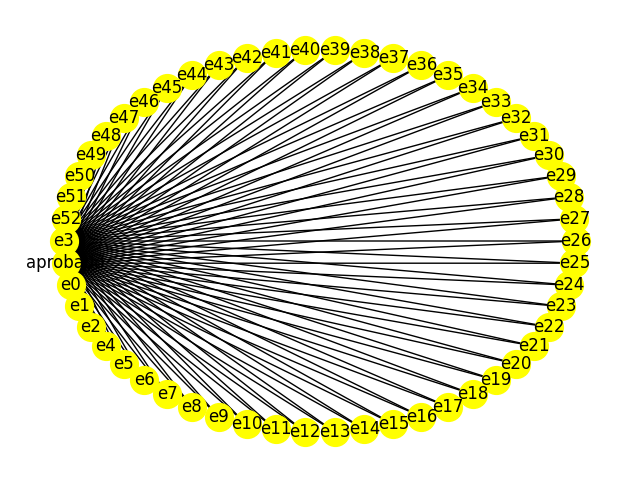

In [24]:
# Visualizar el modelo causal
model.view_model(layout="gml",file_name="../resources/causalidad/graph_causal_model_e3_full")

In [25]:
# Paso 2: Identificar el estimando objetivo bajo el modelo
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

In [26]:
# Paso 3: Estimar el efecto causal con el estimador de categoría econml TLearner
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.econml.metalearners.TLearner",
    confidence_intervals=False,
    method_params={
        "init_params": {
            "models": RandomForestRegressor(
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=1502,
                n_estimators=500,
            )
        },
        "fit_params": {},
    },
)

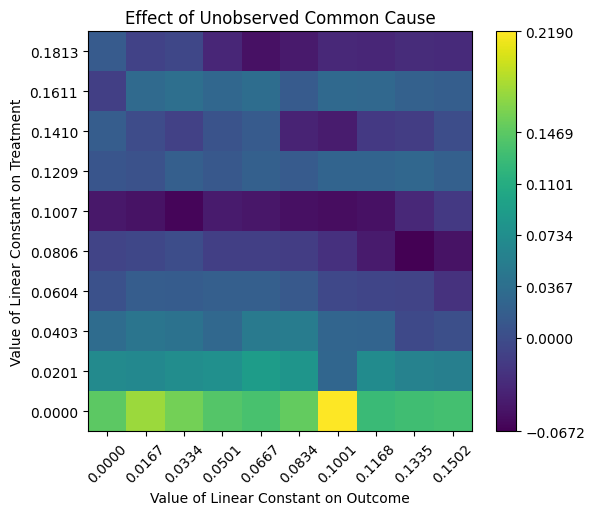

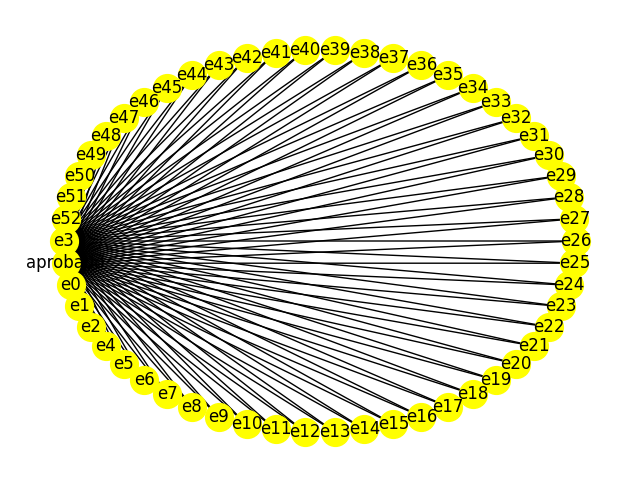

In [27]:
# Refutar el estimado obtenido con la variable de causa común no observada
refute_results_unobserved = model.refute_estimate(
    identified_estimand, 
    estimate, 
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip", 
    confounders_effect_on_outcome="binary_flip"
)

# Visualizar el modelo causal con la variable de causa común no observada
model.view_model(layout="gml", file_name="../resources/causalidad/graph_causal_model_e3_full_with_unobserved")

In [28]:
# Paso 4: Refutar el estimado obtenido
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute")

# Imprimir resultados RandomForestRegressor estimado de efecto causal
print("----------------------------")
print("Estimado de efecto causal:")
print(estimate.value)
print("----------------------------")

----------------------------
Estimado de efecto causal:
0.14685413819358714
----------------------------


In [29]:
print("----------------------------")
print("¿Es aplicable la puerta trasera?")
print(estimate)
print("----------------------------")

----------------------------
¿Es aplicable la puerta trasera?
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                           
─────(E[aprobado|e20,e29,e7,e2,e18,e15,e1,e46,e24,e42,e34,e51,e23,e28,e43,e26,
d[e₃]                                                                         

                                                                              
e21,e52,e17,e35,e8,e14,e49,e10,e47,e36,e4,e38,e37,e48,e16,e19,e39,e33,e30,e44,
                                                                              

                                                             
e12,e9,e41,e45,e0,e50,e31,e22,e5,e6,e25,e27,e32,e40,e11,e13])
                                                             
Estimand assumption 1, Unconfoundedness: If U→{e3} and U→aprobado then P(aprobado|e3,e20,e29,e7,e2,e18,e15,e1,e46,e24,e42,e34,e51,e2

In [30]:
print("----------------------------")
print("Refutación de estimado:")
print(refute_results)
print("----------------------------")

----------------------------
Refutación de estimado:
Refute: Use a Placebo Treatment
Estimated effect:0.14685413819358714
New effect:-0.0007388532430818856
p value:0.92

----------------------------
